## Lab 2: Plotting Upper-Air Data
<br /><br />
In this week's tutorial, we will cover how to plot upper-air observations using matplotlib, cartopy, and MetPy.  Once the tutorial is complete, you will have the maps you need to complete the rest of Lab 2.
<br />
### Module Documentation
1. Siphon IAStateUpperAir: https://unidata.github.io/siphon/latest/api/simplewebservice.html#module-siphon.simplewebservice.iastate
2. Datetime: https://docs.python.org/3/library/datetime.html
3. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
4. Caropy crs: https://scitools.org.uk/cartopy/docs/latest/reference/crs.html
5. Cartopy Feature: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
6. MetPy Station Plot: https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html
7. NumPy Zeros Function: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

<br /><br />

If you have any questions about the code below always feel free to reach out to me at mpvossen@uwm.edu and I am always willing to further explain the code. <br /> <br />

---

### Part I: 300 hPa
<br />
1. As usual, we start by importing the modules we need for our Python code.

In [13]:
#from the siphon module's (from siphon) web data downloader (.simplewebservice) specifically for Iowa State (.iastate) import the upper air downloader (import IAStateUpperAir)
from siphon.simplewebservice.iastate import IAStateUpperAir
#from python's datetime module (from datetime) import the date and time capabilities (import datetime)
from datetime import datetime
#import the plotting abilities of the matplotlib module (import matplotlib.pyplot) and save it to the variable plt (as plt)
import matplotlib.pyplot as plt
#from metpy's plotting abilities (metpy.plots) import the abilities to create a station plot (StationPlot) and the sky cover symbols (sky_cover).
from metpy.plots import StationPlot, sky_cover
#import the cartopy (cartopy) module's coordinate reference system (.crs) and save it to the variable crs
import cartopy.crs as crs
#import the cartopy (cartopy) module's ability to plot geographic data (.feature) and save it to the variable cfeature 
import cartopy.feature as cfeature
#from the metpy (metpy) module's ability to read and write files (.io) import the function to add latitude and longitude data for upper and surface station data (import add_station_lat_lon) 
from metpy.io import add_station_lat_lon
#import the numpy module and save it to the variable np
import numpy as np

#add this line so that the JupyterHub plots the maps within the Jupyter Notebook
%matplotlib inline

<br /><br />
2. We need to first choose the date and time for which we would like to download upper-air observations. Using the datetime function that we used in Lab 1, set the variable upper_air_time in the code cell below to September 14, 2022 at 1200 UTC.

In [14]:
upper_air_time =datetime (2022,9,14,0)

<br /><br />
3. Using siphon to download upper-air data allows us request only the data we need rather than the full dataset. One way in which this can be done is by specifying a single level to download. In the code below, I set our level to be 300 hPa:

In [15]:
level = 300 

<br /><br />
4. We are now ready to download our upper-air data.  Below I used the information specified earlier in this Notebook to download the upper air data from the Iowa State data server:

In [16]:
#using the Iowa State upper air downloader (IAStateUpperAir) I download all available data (.request_all_data()) for a specific time (upper_air_time) and specific pressure level (level)
data = IAStateUpperAir.request_all_data(upper_air_time, level)

#the Iowa State data does not natively have the latitude and longitude data for each station we need in order to plot.
#Here, we use MetPy's ability to add latitude and longitude data to station data (add_station_lat_lon)
#for the data we just downloaded (data) and save it to the variable data
data = add_station_lat_lon(data)

#print the upper-air data after we have added the latitude and longitude data.  Note that it is a pandas dataframe.
data

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude
0,300.0,9240.0,-41.3,-60.3,300.0,81.0,CWPL,2022-09-14,70.148058,-40.500000,51.47,-90.2
1,300.0,9560.0,-34.9,-39.3,250.0,61.0,CWQI,2022-09-14,57.321250,20.863229,NaN,NaN
2,300.0,9350.0,-42.3,-55.3,255.0,42.0,CWSE,2022-09-14,40.568885,10.870400,53.53,-114.08
3,300.0,9240.0,-42.5,-46.3,225.0,70.0,CYAH,2022-09-14,49.497475,49.497475,53.75,-73.67
4,300.0,8920.0,-51.1,-53.7,285.0,35.0,CYBK,2022-09-14,33.807404,-9.058667,64.28,-96.07
...,...,...,...,...,...,...,...,...,...,...,...,...
109,300.0,9580.0,-33.5,-40.5,230.0,75.0,KWAL,2022-09-14,57.453333,48.209071,37.93,-75.47
110,300.0,9690.0,-30.9,-32.8,210.0,24.0,KXMR,2022-09-14,12.000000,20.784610,28.47,-80.56
111,300.0,9140.0,-46.5,-49.1,215.0,100.0,KYAK,2022-09-14,57.357644,81.915204,NaN,NaN
112,300.0,9330.0,-42.3,-45.7,100.0,21.0,KYMW,2022-09-14,-20.680963,3.646612,NaN,NaN


<br /><br />
5. MetPy does not know the latitude and longitude for some stations in the downloaded data. For these stations, it inserted a missing value instead. This missing value will cause problems when we start to plot and thus we need to remove the data for those stations.

In [17]:
#the syntax below uses the pandas dropna function
#take the data we have (data) and remove the row if there are missing values (.dropna(how='any')) in the latitude and longitude columns (subset=['latitude', 'longitude'])
data = data.dropna(how='any', subset=['latitude', 'longitude'])

<br /><br />
6. As we wish to plot these data on a map, and we need to set our map's projection.  Since we are in the midlatitudes, in the code below I set our map to have a Lambert Conformal Conic projection that is centered at a longitude of -95 degrees (95°W) and a central latitude of 35 degrees (35°N).  I also set the cone that defines the Lambert Conformal Conic projection to intersect the globe at 27.5°N and 42.5°N to minimize the map's distortion.

In [18]:
#from cartopy's coordinate reference system (crs) function, get the Lambert Conformal Conic projection (.LambertConformal()) 
#with a central longitude at -95 degrees (central_longitude=-95), a central latitude at 35 degrees (central_latitude=35)
#and have the cone intersect at 27.5 and 42.5 degrees (standard_parallels=[27.5,42.5])
proj = crs.LambertConformal(central_longitude=-95, central_latitude=35, standard_parallels=[27.5,42.5])

<br /><br />
7. Upper-air station models vary in terms of whether they depict dewpoint temperature or dewpoint depression (i.e., temperature minus dewpoint temperature). In this lab, we will plot our data using dewpoint depression.  With the data being in a pandas DataFrame, we can obtain the dewpoint depression value for each station by simply subtracting the dewpoint column from the temperature column.

In [19]:
#take the data's temperature column values and subtract the dewpoint column values.  
#By adding .values I completely remove all dataframe capabilities and I just get the values contained in the dataframe.
#After subtracting the two values we save the output to our dataframe again.  Since we do not have a dewpoint-depression column
#when we save to data["dewpoint-depression"], pandas automatically creates the column with that name.
data["dewpoint-depression"] = data["temperature"].values - data["dewpoint"].values
data

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude,dewpoint-depression
0,300.0,9240.0,-41.3,-60.3,300.0,81.0,CWPL,2022-09-14,70.148058,-4.050000e+01,51.47,-90.2,19.0
2,300.0,9350.0,-42.3,-55.3,255.0,42.0,CWSE,2022-09-14,40.568885,1.087040e+01,53.53,-114.08,13.0
3,300.0,9240.0,-42.5,-46.3,225.0,70.0,CYAH,2022-09-14,49.497475,4.949747e+01,53.75,-73.67,3.8
4,300.0,8920.0,-51.1,-53.7,285.0,35.0,CYBK,2022-09-14,33.807404,-9.058667e+00,64.28,-96.07,2.6
5,300.0,8930.0,-51.5,-55.3,40.0,44.0,CYEU,2022-09-14,-28.282655,-3.370596e+01,80.0,-85.82,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,300.0,9550.0,-36.7,-45.7,270.0,25.0,KUNR,2022-09-14,25.000000,4.592425e-15,44.07,-103.2,9.0
107,300.0,9530.0,-37.3,-58.3,250.0,22.0,KVEF,2022-09-14,20.673238,7.524443e+00,36.04,-115.18,21.0
108,300.0,9690.0,-30.3,-49.3,235.0,13.0,KVER,2022-09-14,10.648977,7.456494e+00,38.95,-92.68,19.0
109,300.0,9580.0,-33.5,-40.5,230.0,75.0,KWAL,2022-09-14,57.453333,4.820907e+01,37.93,-75.47,7.0


<br /><br />
8. We are now ready to plot our data.  Since all plotting code must be in one cell in a Jupyter Notebook, I will explain what each code block does in the comments.  I placed the plotting code in a function since we are going to separately plot observations at multiple levels.  Placing this code into a function allows us to easily use the code again for a different level since all we have to do is call the function and pass in the new data.  Note that no plot will appear when you run this block of code. You need to call the function first before any plot would be generated.

In [21]:
"""
In the line below I define the function create_upper_air_plot.  The purpose of this function is to create an upper-air station plot and it requires the following variables:

data : PANDAS DATAFRAME
    This is the DataFrame that holds the upper-air observation data.
proj : CARTOPY CRS OBJECT
    This variable holds the map projection.
upper_air_time : DATETIME
    This is the valid time for the observations.
level : INTEGER
    This is the desired observation level in hPa.
if_dewpoint : BOOLEAN
    Wheather we are plotting dew point (True) or dewpoint depression (False)


"""

def create_upper_air_plot(data, proj, upper_air_time, level, if_dewpoint):  
    """
    This creates the figure for our plot.  Think of this as a blank piece of paper.
    Create a figure (plt.figure()) with a size of 1000px x 1500px (figsize=(10,15)) and a resolution of 300 dots per inch (dpi=300).
    A dpi of 300 is standard for publication figures.
    """
    fig = plt.figure(figsize=(10,15),dpi=300)
    """
    We now need to create the map on our figure.
    Here, I add a plot within the figure (plt.subplot()) and set the map projection to the projection we specified before (projection=proj).
    """
    ax = plt.subplot(projection = proj)
    """
    Here, I add outlines of land masses, countries (BORDERS), and states with a resolution of 50m (about 0.83°).  Cartopy gives you the option of having borders with resolutions of 110m, 50m, and 10m.
    Note that I use the zorder option in each option.  The zorder determines what is going to be drawn first.  The lower the number, the earlier it gets drawn on the maps.
    When things get drawn earlier, other features may be drawn over that feature. The default zorder value is 5.
    
    ax.add_feature(cfeature.boarder_you_want.with_scale('the resolution'), edgecolor='color of your choosing', facecolor='the color of the shape outlined', 
    linewidth=the width of the outline, zorder=the order to draw the feature when compared to the other features)
    """
    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)

    """
    Here I limit the plot's area to just the United States and southern Canada.
    
    ax.set_extent([left longitude, right longitude, bottom latitude, upper latitude], crs = the coordinate system that you used to set the extent)
    """
    ax.set_extent([-130,-70,23,60], crs=crs.PlateCarree())
    
    """
    Here we setup the station plot.  This line defines the observation locations.
    
    StationPlot(plot variable, longitude of each station, latitude of each station, clip_on=whether to clip off values that fall outside the plot,
    transform=the coordinate system that the data is in, fontsize=the size of the data values)
    """
    stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                              clip_on=True, transform=crs.PlateCarree(), fontsize=5)
    
    """
    This line plots the temperature values on the station plot.  In an upper-air plot, we want the temperature values to be plotted in the 
    upper left, and so we tell MetPy to plot the temperature to the northwest ('NW') of the center of the station plot.
    
    plot_parameter(location relative to center, data values to plot, color=color of data value when plotted)
    """
    stationplot.plot_parameter('NW', data['temperature'].values, color='red')
    
    """
    This line plots the dewpoint depression values.  In upper-air plots, we want the dewpoint depression to be plotted in the
    lower left, and so we tell MetPy to plot the dewpoint depression to the southwest ('SW') of the center.
    """
    if if_dewpoint == False:
        stationplot.plot_parameter('SW', data["dewpoint-depression"].values,color='darkgreen')
        
        """
        If we want dewpoint, this line plots the dewpoint to the southwest ('SW') of center.
        """
    else:
        stationplot.plot_parameter('SW', data["dewpoint"].values,color='darkgreen')
    
    """
    This line plots the geopotential height values.  In upper-air plots, the geopotential height is in the upper right, and so we tell 
    MetPy to plot the geopotential height to the northeast ('NE') of the center.  We typically only want to plot the first three digits of 
    the height value, and so we have to add a formatter to this argument to do so.  The lambda command in the formatter is essentially like a function.
    The lambda can take an argument, which in this case is v, and it has an expression, which in this case is the format function.  In the format function, we 
    take the variable v and remove the decimal places (.0) while keeping the number as a float (f).  Once the format function is finished, we keep 
    only the first three digits ([:3]).
    
    lambda argument : expression
    """
    stationplot.plot_parameter('NE', data['height'].values, formatter = lambda v: format(v, '.0f')[:3])
    """
    Here, I create a list of zeros for plotting the station plot's center symbol.  In an upper-air plot, the center symbol is always an open circle, which in MetPy is 
    specified by the symbol 0.  Thus, we need a list of zeros that is the same length as the number of stations we have.
    The line below finds the number of latitude values are in our data, which tells us how many stations are in our data since each station has one latitude value.
    """
    num_of_stations = len(data["latitude"].values)
    
    """
    Here I use numpy's array of zeros function (np.zeros()) to create an array with zeros that is the same length as the number of upper-air observation stations we have.
    Also with the dtype agument I tell numpy that I want integers rather than float values.  The zeros must be integers in order to use MetPy's center symbol function.
    
    np.zeros(length of array, dtype = the data type)
    """
    
    zeros = np.zeros(num_of_stations, dtype=int)
    
    """
    This line plots the center symbol by passing in our list of zeros from before.
    I also add in the sky_cover argument to tell MetPy that the value we passed in is to plot a sky cover symbol (an open circle) rather than a number.
    """
    
    stationplot.plot_symbol('C', zeros, sky_cover)
    
    """
    Next, we use metpy's plot_barb function to draw the wind barb (representing wind speed and direction) for each station.
    To use this function, we must pass in the u- and v-components of the wind.
    """
    
    stationplot.plot_barb(data['u_wind'].values, data['v_wind'].values)

    """
    Finally, we need to add a title to this plot so that we and others know what is plotted on this map.
    In the line below, I create a special kind of string called a f string.  F strings allow you to insert string variable values
    easily into string rather than writing out a long string concatenation statement.  Here to insert a variable into the string 
    all you need to do is {variable_name}.  This type of string also works with times.  In the string below I take the upper_air_time variable
    and, using the datetime parsing codes from Lab 1, I set the time's display as (mm/dd/yyyy HHMM).  When displayed, this string should look like the following:
    300 hPa Observations at 08/17/2022 1200 UTC
    """
    
    plot_title= f"{str(level)} hPa Observations at {upper_air_time:%m/%d/%Y %H%M} UTC"
    
    """
    Here, I take our title and tell maptlotlib to add it to the plot.  I also tell matplotlib to plot the title so that it is in bold text (weight="bold").
    """
    
    plt.title(plot_title, weight="bold")

    """
    Finally, let's see what our plot looks like.
    """
    plt.show()


<br /><br /> 
9.  To create a plot, we need to call the function we just created.  For this, I pass in the variables containing the upper-air data, map projection information, the observation time, the desired vertical level, and if we are working with dewpoint or dewpoint depression.

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloadi

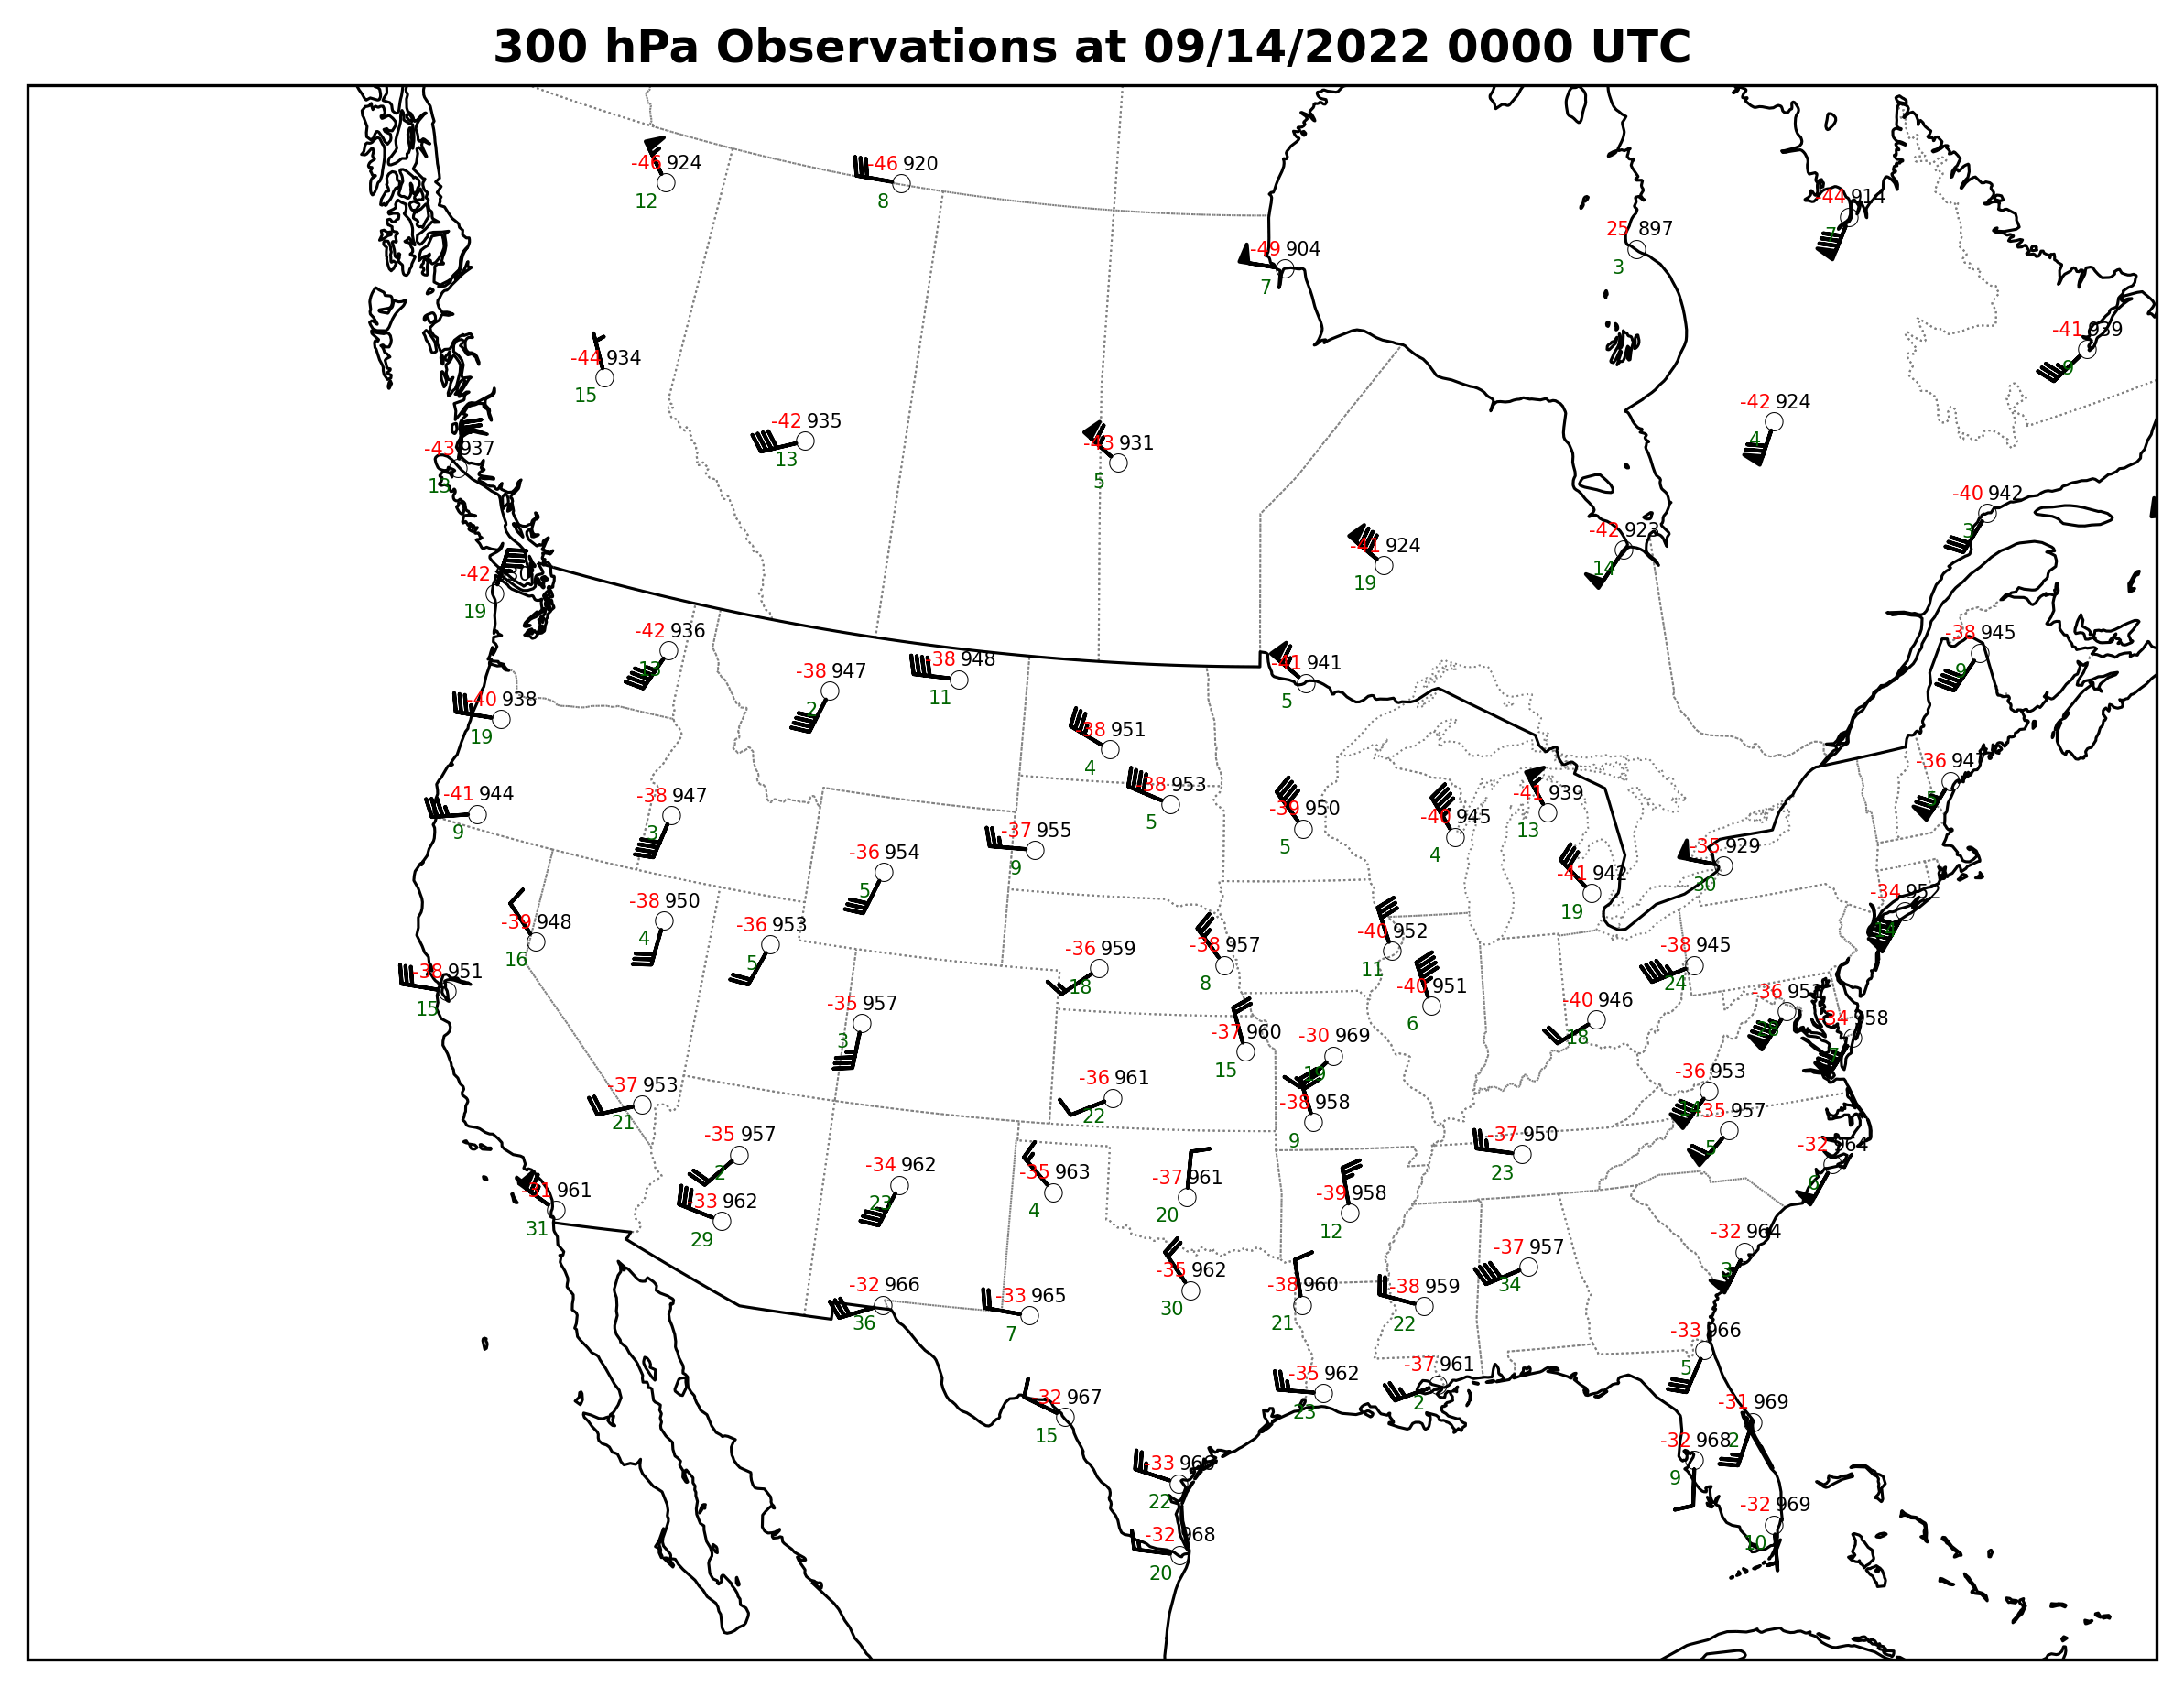

In [22]:
create_upper_air_plot(data, proj, upper_air_time, level, False)

<br /><br />
10. Print out the map created in the previous step and use it to complete the rest of Part I in Lab 2. 

<br />

---

### Part II: 500 hPa
<br />
1. In the code block below, download the 500 hPa observations for September 14, 2022 at 1200 UTC.

In [32]:
level = 500
#using the Iowa State upper air downloader (IAStateUpperAir) I download all available data (.request_all_data()) for a specific time (upper_air_time) and specific pressure level (level)
data = IAStateUpperAir.request_all_data(upper_air_time, level)

#the Iowa State data does not natively have the latitude and longitude data for each station we need in order to plot.
#Here, we use MetPy's ability to add latitude and longitude data to station data (add_station_lat_lon)
#for the data we just downloaded (data) and save it to the variable data
data = add_station_lat_lon(data)




<br /><br />
2. In the code block below, remove the stations with missing latitude and longitude data, then compute and add dewpoint depression to the DataFrame containing the downloaded observation data.

In [33]:
data = data.dropna(how='any', subset=['latitude', 'longitude'])
data["dewpoint-depression"] = data["temperature"].values - data["dewpoint"].values
data

,pressure,height,temperature,dewpoint,direction,speed,station,time,u_wind,v_wind,latitude,longitude,dewpoint-depression
0,500.0,5610.0,-18.7,-40.7,300.0,44.0,CWPL,2022-09-14,38.105118,-22.000000,51.47,-90.2,22.0
2,500.0,5690.0,-15.9,-18.8,260.0,19.0,CWSE,2022-09-14,18.711347,3.299315,53.53,-114.08,2.9
3,500.0,5600.0,-17.1,-21.8,230.0,43.0,CYAH,2022-09-14,32.939911,27.639867,53.75,-73.67,4.7
4,500.0,5420.0,-26.7,-31.4,280.0,20.0,CYBK,2022-09-14,19.696155,-3.472964,64.28,-96.07,4.7
5,500.0,5440.0,-26.9,-30.7,30.0,29.0,CYEU,2022-09-14,-14.500000,-25.114737,80.0,-85.82,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,500.0,5820.0,-10.3,-28.3,210.0,11.0,KUNR,2022-09-14,5.500000,9.526279,44.07,-103.2,18.0
107,500.0,5790.0,-11.3,-19.3,245.0,20.0,KVEF,2022-09-14,18.126156,8.452365,36.04,-115.18,8.0
108,500.0,5860.0,-5.1,-7.0,350.0,12.0,KVER,2022-09-14,2.083778,-11.817693,38.95,-92.68,1.9
109,500.0,5800.0,-8.3,-54.3,240.0,43.0,KWAL,2022-09-14,37.239092,21.500000,37.93,-75.47,46.0


<br /><br />
3. Using these 500 hPa data, use the plotting function to plot the 500 hPa observations. Print out the resulting map and use it to complete the rest of Part II in Lab 2.

/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/tljh/user/lib/python3.7/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


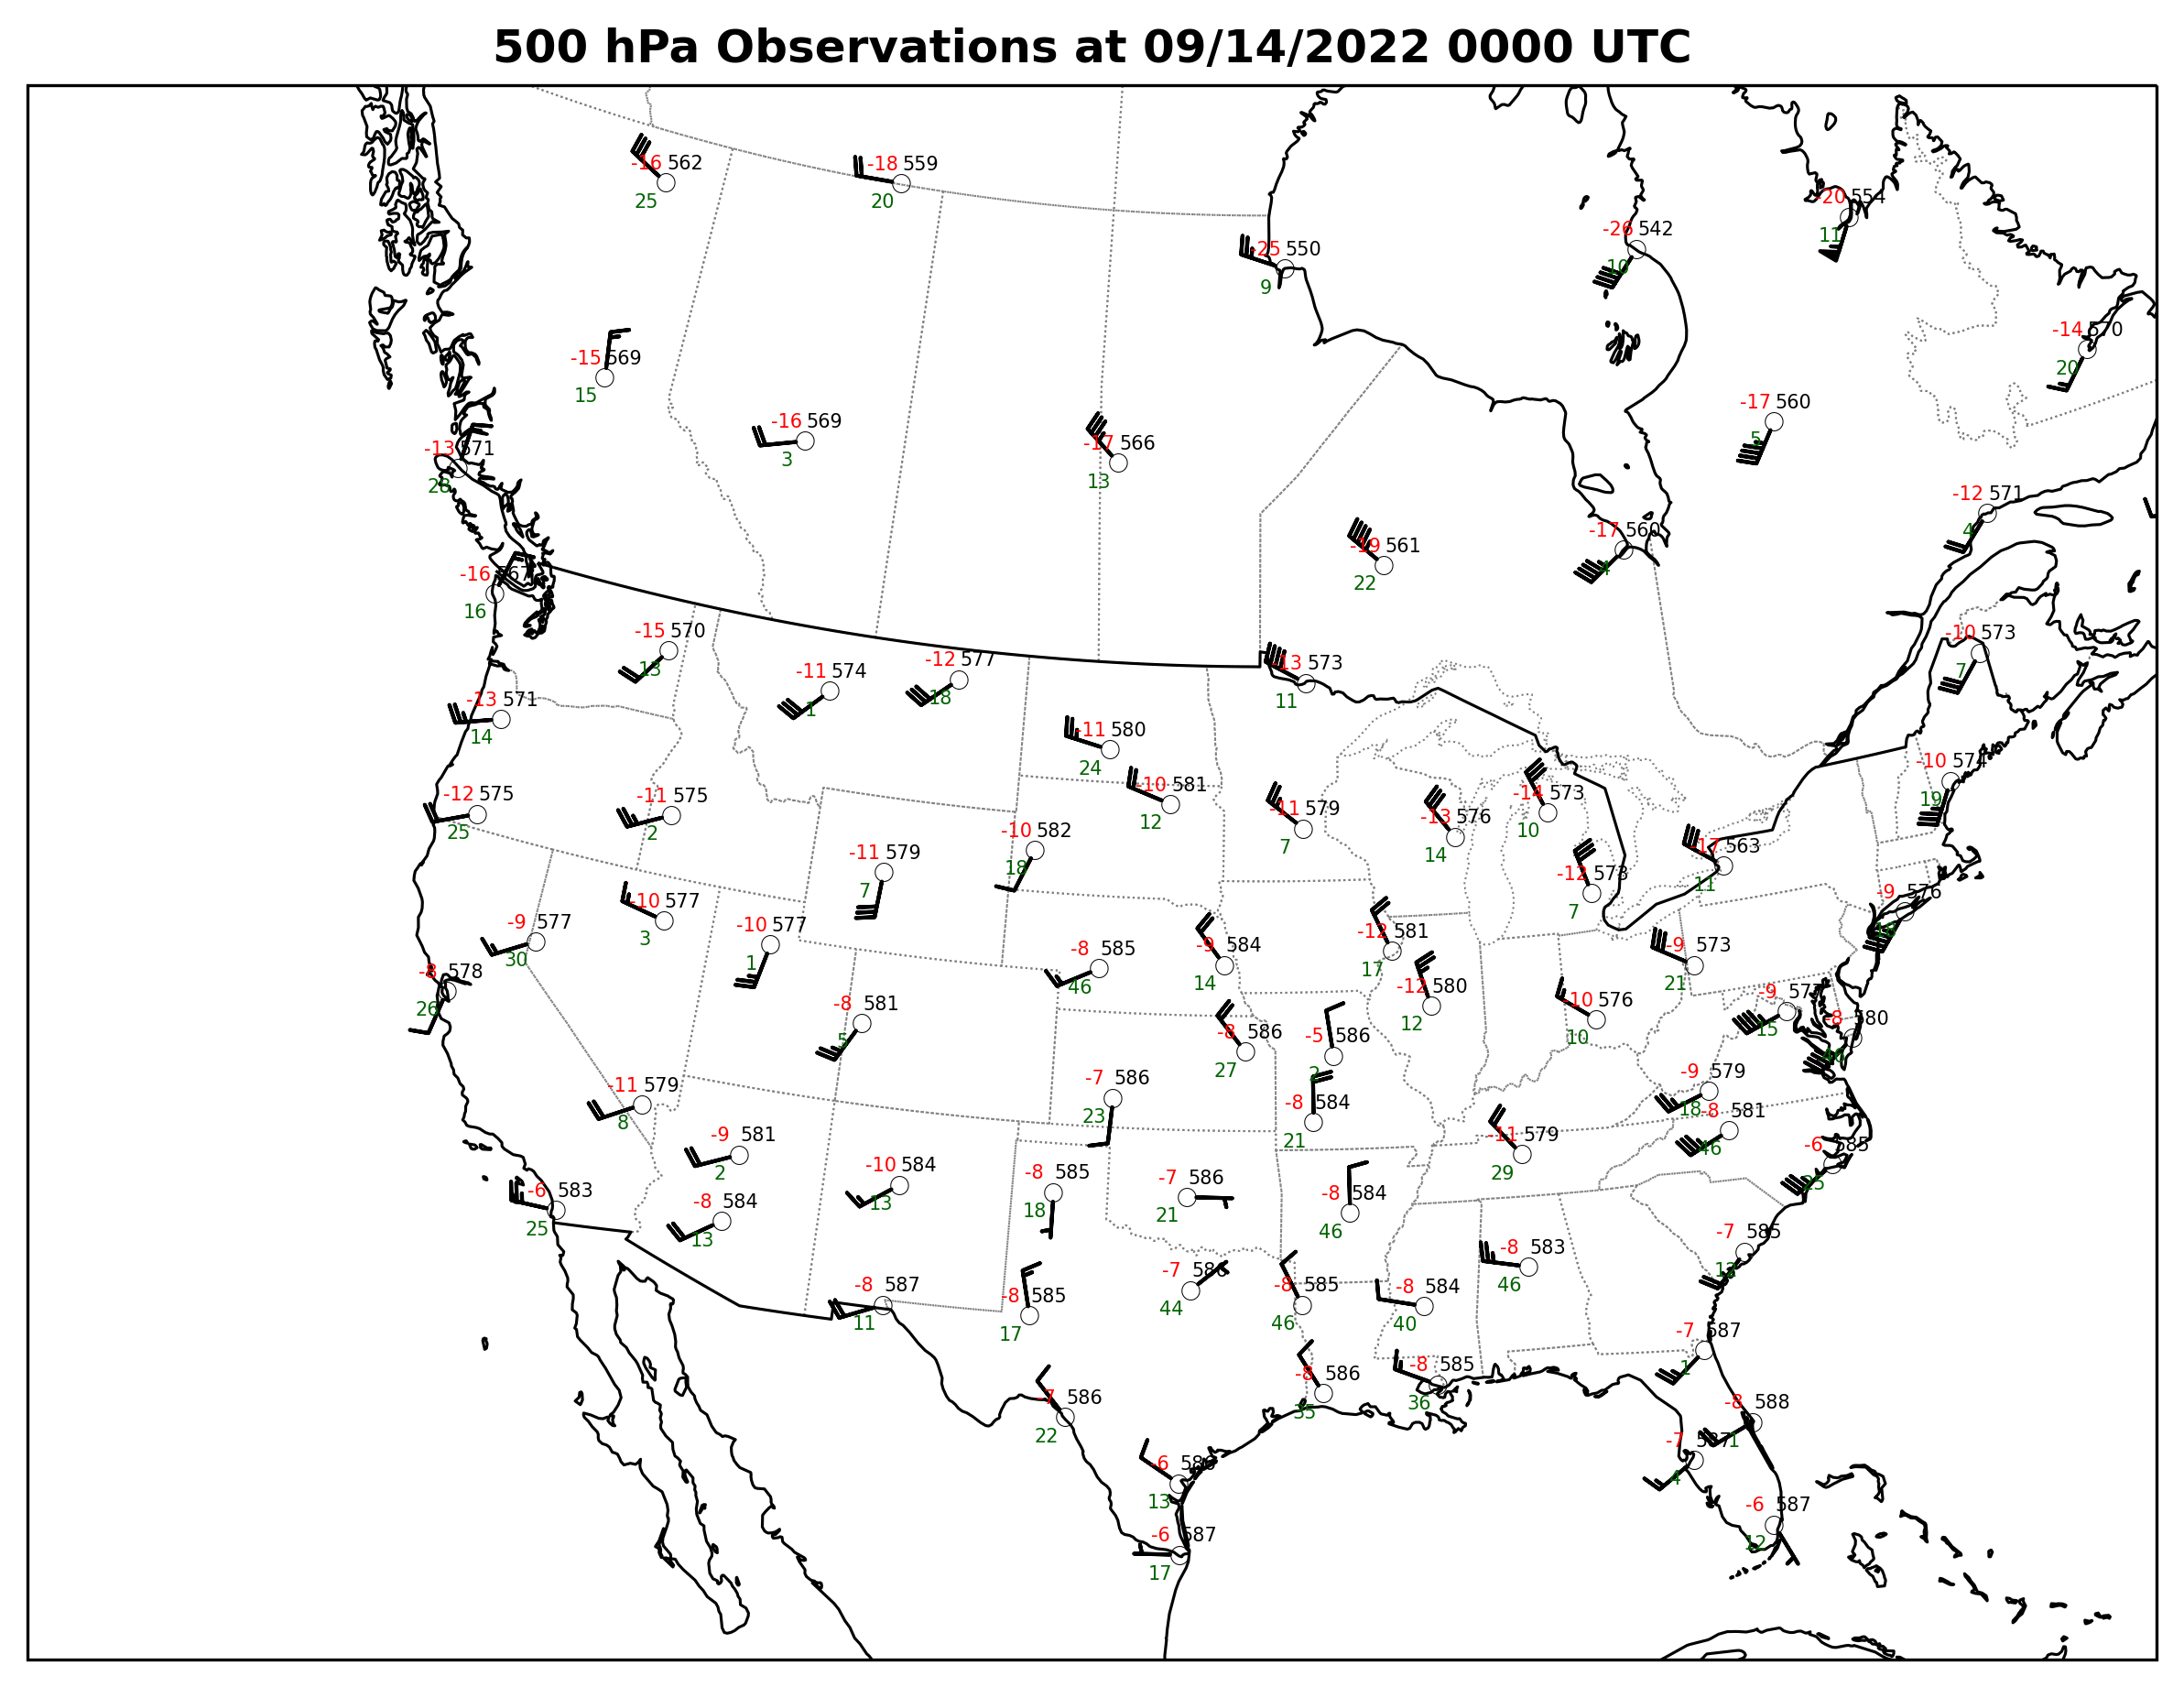

In [36]:
def create_upper_air_plot(data, proj, upper_air_time, level, if_dewpoint):  
    """
    This creates the figure for our plot.  Think of this as a blank piece of paper.
    Create a figure (plt.figure()) with a size of 1000px x 1500px (figsize=(10,15)) and a resolution of 300 dots per inch (dpi=300).
    A dpi of 300 is standard for publication figures.
    """
    fig = plt.figure(figsize=(10,15),dpi=300)
    """
    We now need to create the map on our figure.
    Here, I add a plot within the figure (plt.subplot()) and set the map projection to the projection we specified before (projection=proj).
    """
    ax = plt.subplot(projection = proj)
    """
    Here, I add outlines of land masses, countries (BORDERS), and states with a resolution of 50m (about 0.83°).  Cartopy gives you the option of having borders with resolutions of 110m, 50m, and 10m.
    Note that I use the zorder option in each option.  The zorder determines what is going to be drawn first.  The lower the number, the earlier it gets drawn on the maps.
    When things get drawn earlier, other features may be drawn over that feature. The default zorder value is 5.
    
    ax.add_feature(cfeature.boarder_you_want.with_scale('the resolution'), edgecolor='color of your choosing', facecolor='the color of the shape outlined', 
    linewidth=the width of the outline, zorder=the order to draw the feature when compared to the other features)
    """
    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)

    """
    Here I limit the plot's area to just the United States and southern Canada.
    
    ax.set_extent([left longitude, right longitude, bottom latitude, upper latitude], crs = the coordinate system that you used to set the extent)
    """
    ax.set_extent([-130,-70,23,60], crs=crs.PlateCarree())
    
    """
    Here we setup the station plot.  This line defines the observation locations.
    
    StationPlot(plot variable, longitude of each station, latitude of each station, clip_on=whether to clip off values that fall outside the plot,
    transform=the coordinate system that the data is in, fontsize=the size of the data values)
    """
    stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                              clip_on=True, transform=crs.PlateCarree(), fontsize=5)
       
    """
    This line plots the temperature values on the station plot.  In an upper-air plot, we want the temperature values to be plotted in the 
    upper left, and so we tell MetPy to plot the temperature to the northwest ('NW') of the center of the station plot.
    
    plot_parameter(location relative to center, data values to plot, color=color of data value when plotted)
    """
    stationplot.plot_parameter('NW', data['temperature'].values, color='red')
    
    """
    This line plots the dewpoint depression values.  In upper-air plots, we want the dewpoint depression to be plotted in the
    lower left, and so we tell MetPy to plot the dewpoint depression to the southwest ('SW') of the center.
    """
    if if_dewpoint == False:
        stationplot.plot_parameter('SW', data["dewpoint-depression"].values,color='darkgreen')
        
        """
        If we want dewpoint, this line plots the dewpoint to the southwest ('SW') of center.
        """
    else:
        stationplot.plot_parameter('SW', data["dewpoint"].values,color='darkgreen')
   
    
    
    """
    This line plots the geopotential height values.  In upper-air plots, the geopotential height is in the upper right, and so we tell 
    MetPy to plot the geopotential height to the northeast ('NE') of the center.  We typically only want to plot the first three digits of 
    the height value, and so we have to add a formatter to this argument to do so.  The lambda command in the formatter is essentially like a function.
    The lambda can take an argument, which in this case is v, and it has an expression, which in this case is the format function.  In the format function, we 
    take the variable v and remove the decimal places (.0) while keeping the number as a float (f).  Once the format function is finished, we keep 
    only the first three digits ([:3]).
    
    lambda argument : expression
    """
    stationplot.plot_parameter('NE', data['height'].values, formatter = lambda v: format(v, '.0f')[:3])
    """
    Here, I create a list of zeros for plotting the station plot's center symbol.  In an upper-air plot, the center symbol is always an open circle, which in MetPy is 
    specified by the symbol 0.  Thus, we need a list of zeros that is the same length as the number of stations we have.
    The line below finds the number of latitude values are in our data, which tells us how many stations are in our data since each station has one latitude value.
    """
    num_of_stations = len(data["latitude"].values)
    
    """
    Here I use numpy's array of zeros function (np.zeros()) to create an array with zeros that is the same length as the number of upper-air observation stations we have.
    Also with the dtype agument I tell numpy that I want integers rather than float values.  The zeros must be integers in order to use MetPy's center symbol function.
    
    np.zeros(length of array, dtype = the data type)
    """
    
    zeros = np.zeros(num_of_stations, dtype=int)
    
    """
    This line plots the center symbol by passing in our list of zeros from before.
    I also add in the sky_cover argument to tell MetPy that the value we passed in is to plot a sky cover symbol (an open circle) rather than a number.
    """
    
    stationplot.plot_symbol('C', zeros, sky_cover)
    
    """
    Next, we use metpy's plot_barb function to draw the wind barb (representing wind speed and direction) for each station.
    To use this function, we must pass in the u- and v-components of the wind.
    """
    
    stationplot.plot_barb(data['u_wind'].values, data['v_wind'].values)

    """
    Finally, we need to add a title to this plot so that we and others know what is plotted on this map.
    In the line below, I create a special kind of string called a f string.  F strings allow you to insert string variable values
    easily into string rather than writing out a long string concatenation statement.  Here to insert a variable into the string 
    all you need to do is {variable_name}.  This type of string also works with times.  In the string below I take the upper_air_time variable
    and, using the datetime parsing codes from Lab 1, I set the time's display as (mm/dd/yyyy HHMM).  When displayed, this string should look like the following:
    300 hPa Observations at 08/17/2022 1200 UTC
    """
    
    plot_title= f"{str(level)} hPa Observations at {upper_air_time:%m/%d/%Y %H%M} UTC"
    
    """
    Here, I take our title and tell maptlotlib to add it to the plot.  I also tell matplotlib to plot the title so that it is in bold text (weight="bold").
    """
    
    plt.title(plot_title, weight="bold")

    """
    Finally, let's see what our plot looks like.
    """
    plt.show()
create_upper_air_plot(data, proj, upper_air_time, level, False)

<br /><br />

---

### Part III: 850 hPa
1. Repeat Part II, except for 850 hPa, with one change: do not compute and plot dewpoint depression, but instead plot the dewpoint temperature. Print out the resulting map and use it to complete the rest of Part II in Lab 2. Be sure that you plot dewpoint not dewpoint depression.

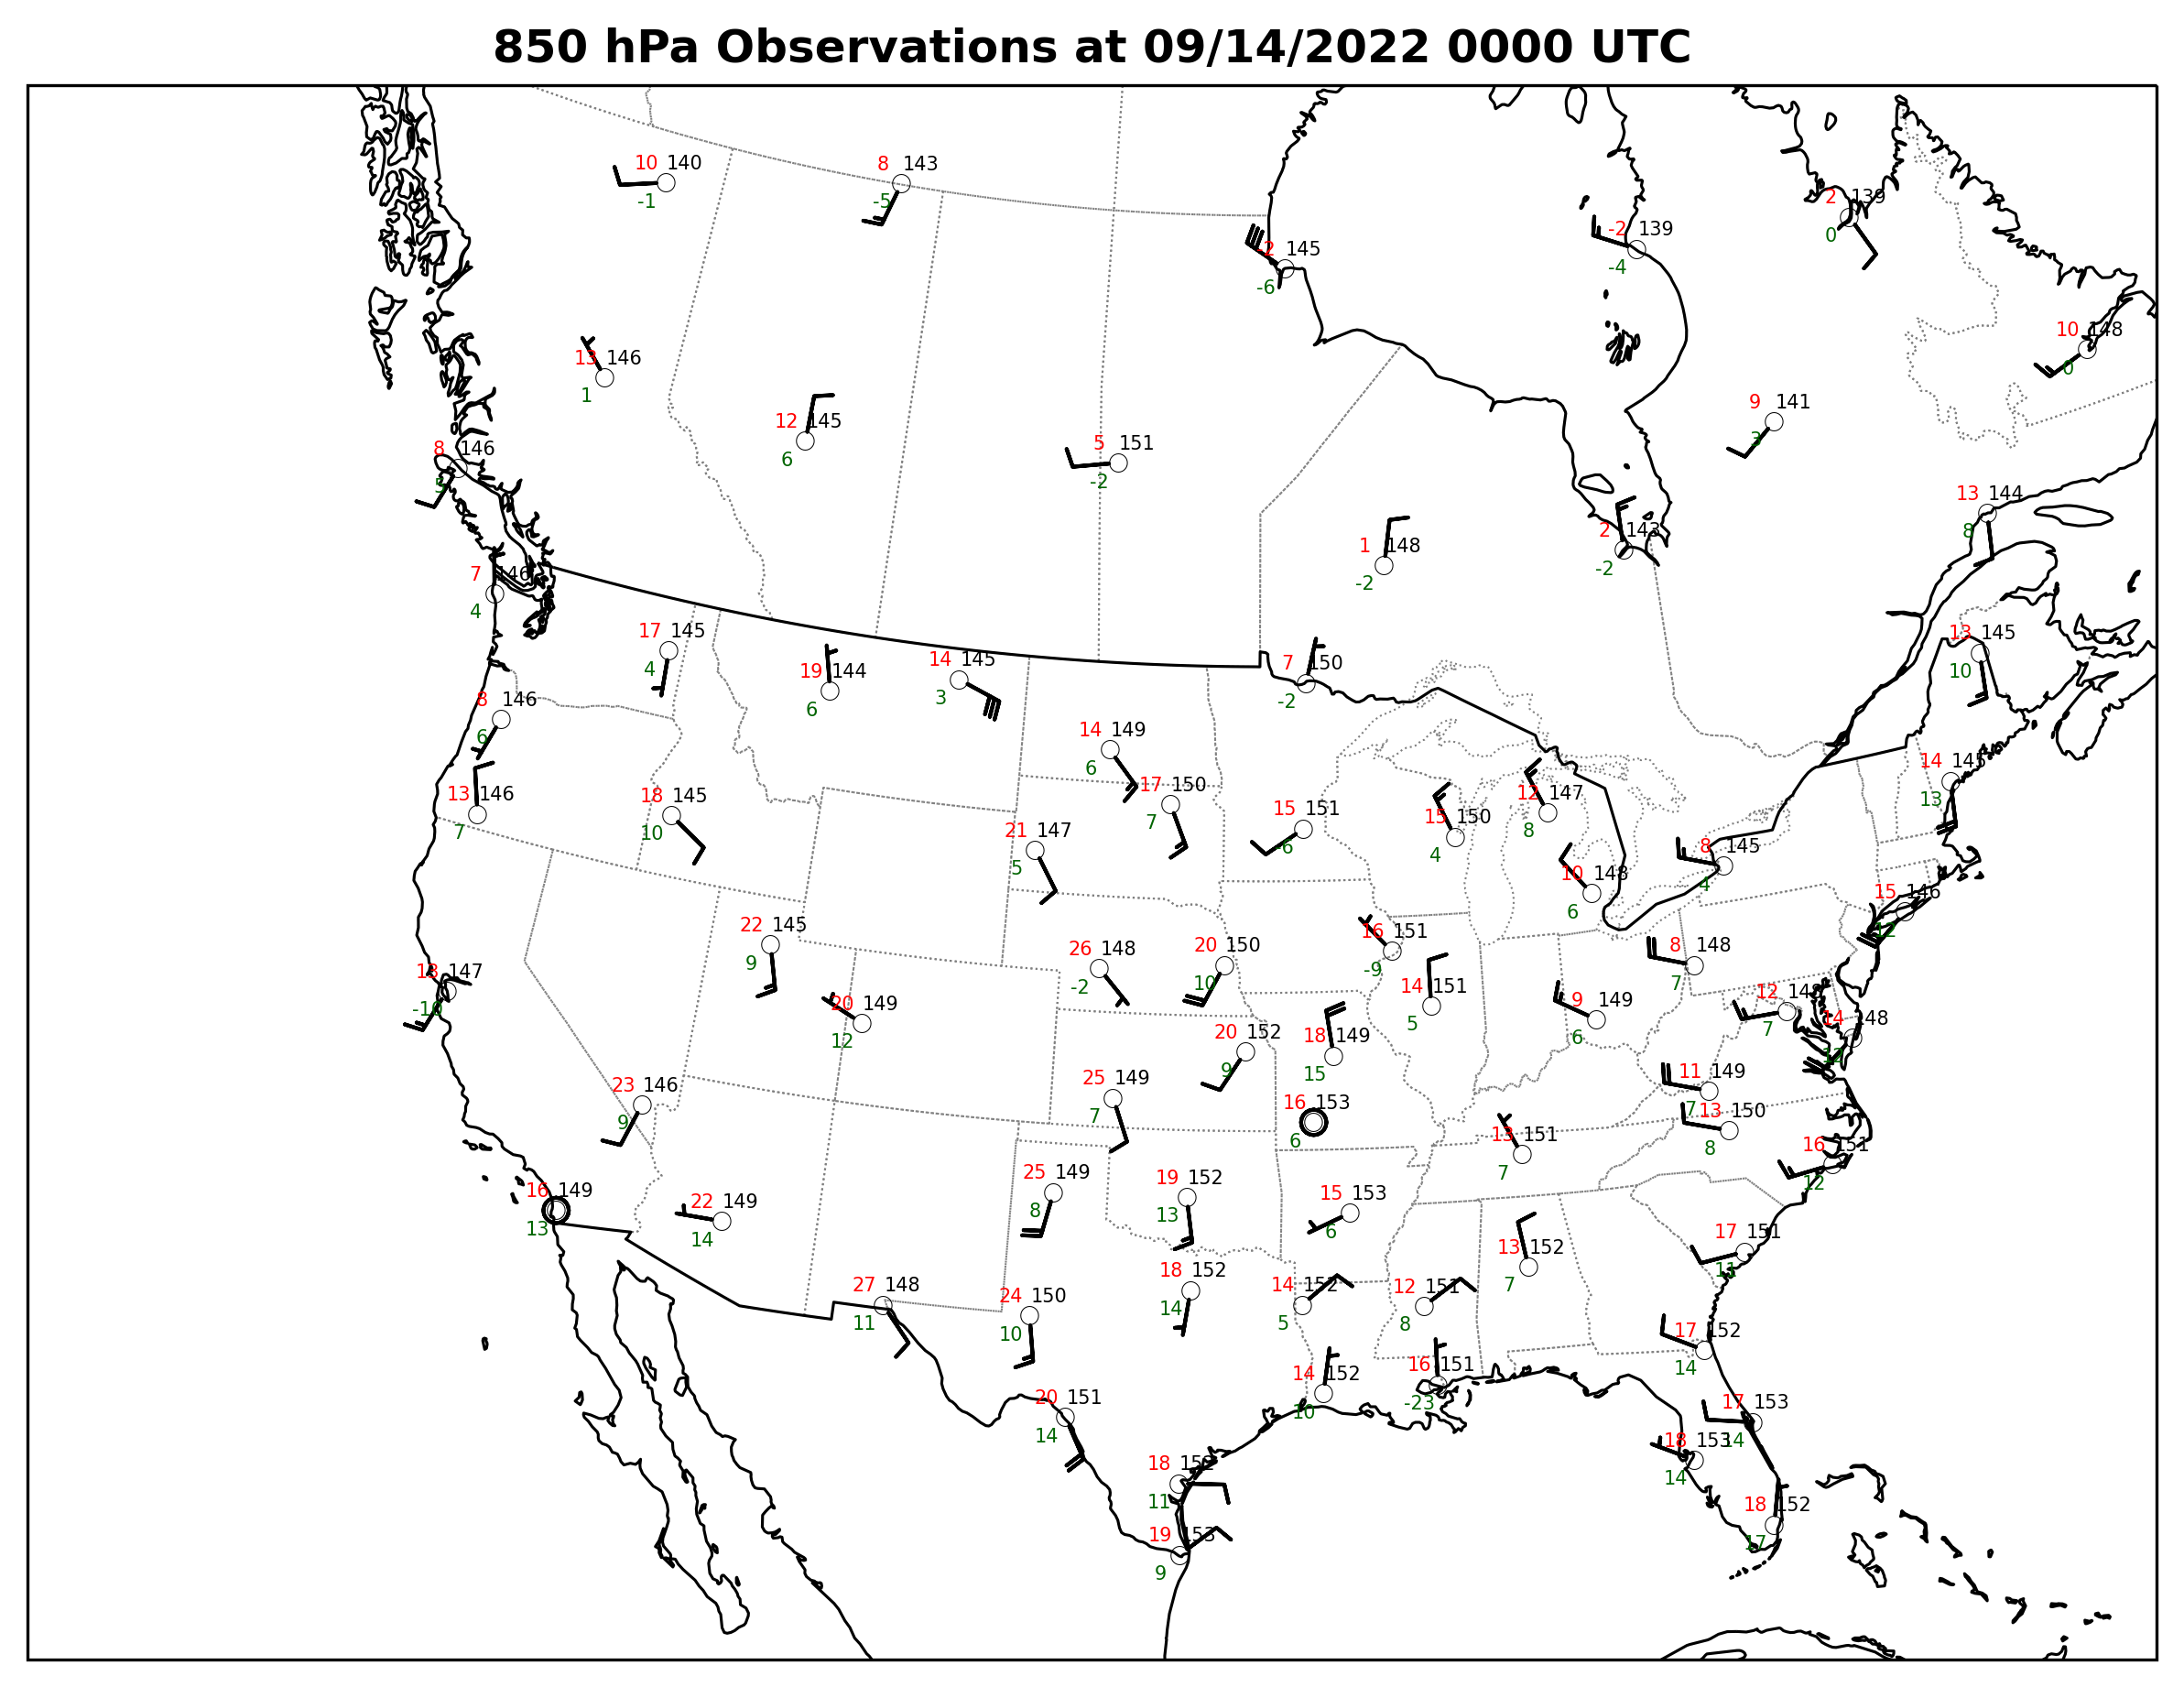

In [37]:
level = 850
#using the Iowa State upper air downloader (IAStateUpperAir) I download all available data (.request_all_data()) for a specific time (upper_air_time) and specific pressure level (level)
data = IAStateUpperAir.request_all_data(upper_air_time, level)

#the Iowa State data does not natively have the latitude and longitude data for each station we need in order to plot.
#Here, we use MetPy's ability to add latitude and longitude data to station data (add_station_lat_lon)
#for the data we just downloaded (data) and save it to the variable data
data = add_station_lat_lon(data)

data = data.dropna(how='any', subset=['latitude', 'longitude'])

def create_upper_air_plot(data, proj, upper_air_time, level, if_dewpoint):  
    """
    This creates the figure for our plot.  Think of this as a blank piece of paper.
    Create a figure (plt.figure()) with a size of 1000px x 1500px (figsize=(10,15)) and a resolution of 300 dots per inch (dpi=300).
    A dpi of 300 is standard for publication figures.
    """
    fig = plt.figure(figsize=(10,15),dpi=300)
    """
    We now need to create the map on our figure.
    Here, I add a plot within the figure (plt.subplot()) and set the map projection to the projection we specified before (projection=proj).
    """
    ax = plt.subplot(projection = proj)
    """
    Here, I add outlines of land masses, countries (BORDERS), and states with a resolution of 50m (about 0.83°).  Cartopy gives you the option of having borders with resolutions of 110m, 50m, and 10m.
    Note that I use the zorder option in each option.  The zorder determines what is going to be drawn first.  The lower the number, the earlier it gets drawn on the maps.
    When things get drawn earlier, other features may be drawn over that feature. The default zorder value is 5.
    
    ax.add_feature(cfeature.boarder_you_want.with_scale('the resolution'), edgecolor='color of your choosing', facecolor='the color of the shape outlined', 
    linewidth=the width of the outline, zorder=the order to draw the feature when compared to the other features)
    """
    ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor = "black", facecolor='none',  linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor = "black",  facecolor='none', linewidth=0.75, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor = "grey", linestyle=":", facecolor='none', linewidth=0.5, zorder=1)

    """
    Here I limit the plot's area to just the United States and southern Canada.
    
    ax.set_extent([left longitude, right longitude, bottom latitude, upper latitude], crs = the coordinate system that you used to set the extent)
    """
    ax.set_extent([-130,-70,23,60], crs=crs.PlateCarree())
    
    """
    Here we setup the station plot.  This line defines the observation locations.
    
    StationPlot(plot variable, longitude of each station, latitude of each station, clip_on=whether to clip off values that fall outside the plot,
    transform=the coordinate system that the data is in, fontsize=the size of the data values)
    """
    stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                              clip_on=True, transform=crs.PlateCarree(), fontsize=5)
       
    """
    This line plots the temperature values on the station plot.  In an upper-air plot, we want the temperature values to be plotted in the 
    upper left, and so we tell MetPy to plot the temperature to the northwest ('NW') of the center of the station plot.
    
    plot_parameter(location relative to center, data values to plot, color=color of data value when plotted)
    """
    stationplot.plot_parameter('NW', data['temperature'].values, color='red')
    
    """
    This line plots the dewpoint depression values.  In upper-air plots, we want the dewpoint depression to be plotted in the
    lower left, and so we tell MetPy to plot the dewpoint depression to the southwest ('SW') of the center.
    """

    stationplot.plot_parameter('SW', data["dewpoint"].values,color='darkgreen')
    
    """
    This line plots the geopotential height values.  In upper-air plots, the geopotential height is in the upper right, and so we tell 
    MetPy to plot the geopotential height to the northeast ('NE') of the center.  We typically only want to plot the first three digits of 
    the height value, and so we have to add a formatter to this argument to do so.  The lambda command in the formatter is essentially like a function.
    The lambda can take an argument, which in this case is v, and it has an expression, which in this case is the format function.  In the format function, we 
    take the variable v and remove the decimal places (.0) while keeping the number as a float (f).  Once the format function is finished, we keep 
    only the first three digits ([:3]).
    
    lambda argument : expression
    """
    stationplot.plot_parameter('NE', data['height'].values, formatter = lambda v: format(v, '.0f')[:3])
    """
    Here, I create a list of zeros for plotting the station plot's center symbol.  In an upper-air plot, the center symbol is always an open circle, which in MetPy is 
    specified by the symbol 0.  Thus, we need a list of zeros that is the same length as the number of stations we have.
    The line below finds the number of latitude values are in our data, which tells us how many stations are in our data since each station has one latitude value.
    """
    num_of_stations = len(data["latitude"].values)
    
    """
    Here I use numpy's array of zeros function (np.zeros()) to create an array with zeros that is the same length as the number of upper-air observation stations we have.
    Also with the dtype agument I tell numpy that I want integers rather than float values.  The zeros must be integers in order to use MetPy's center symbol function.
    
    np.zeros(length of array, dtype = the data type)
    """
    
    zeros = np.zeros(num_of_stations, dtype=int)
    
    """
    This line plots the center symbol by passing in our list of zeros from before.
    I also add in the sky_cover argument to tell MetPy that the value we passed in is to plot a sky cover symbol (an open circle) rather than a number.
    """
    
    stationplot.plot_symbol('C', zeros, sky_cover)
    
    """
    Next, we use metpy's plot_barb function to draw the wind barb (representing wind speed and direction) for each station.
    To use this function, we must pass in the u- and v-components of the wind.
    """
    
    stationplot.plot_barb(data['u_wind'].values, data['v_wind'].values)

    """
    Finally, we need to add a title to this plot so that we and others know what is plotted on this map.
    In the line below, I create a special kind of string called a f string.  F strings allow you to insert string variable values
    easily into string rather than writing out a long string concatenation statement.  Here to insert a variable into the string 
    all you need to do is {variable_name}.  This type of string also works with times.  In the string below I take the upper_air_time variable
    and, using the datetime parsing codes from Lab 1, I set the time's display as (mm/dd/yyyy HHMM).  When displayed, this string should look like the following:
    300 hPa Observations at 08/17/2022 1200 UTC
    """
    
    plot_title= f"{str(level)} hPa Observations at {upper_air_time:%m/%d/%Y %H%M} UTC"
    
    """
    Here, I take our title and tell maptlotlib to add it to the plot.  I also tell matplotlib to plot the title so that it is in bold text (weight="bold").
    """
    
    plt.title(plot_title, weight="bold")

    """
    Finally, let's see what our plot looks like.
    """
    plt.show()
create_upper_air_plot(data, proj, upper_air_time, level, False)



<br /><br />
### You have now completed the tutorial part of Lab 2.  Be sure upload a fully rendered version of this Jupyter Notebook to your GitHub repository.